In [11]:
import pandas as pd
import json
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.datasets import load_files
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
import nbimporter
%run part1_data_collection.ipynb
from part1_data_analysis import extract_after_last_slash
import re
#%run part1_data_analysis.ipynb


## K-MEANS ###################

**Text input**

In [22]:
# load the files and extract the text and category in a dataframe
DATA_DIR = "Biographies/"
data_cluster = load_files(DATA_DIR, encoding='utf-8', decode_error="replace")
df_cluster = pd.DataFrame(
    {'text': data_cluster['data'], 
    'category': data_cluster['target']})
df_cluster

,text,category
0,Pavlos Prosalentis (Greek: Παύλος Προσαλέντης;...,1
1,Scott Robinson is a fictional character from t...,0
2,Ricardo Breceda is an artist most well known f...,1
3,"Luis Aranberri (born 1945 in Eibar), better kn...",0
4,Gerhard Henning (27 May 1880 – 16 September 19...,1
...,...,...
255,"Kayode Akintemi (born June 26, 1965) is a Nige...",0
256,"José Belloni (September 12, 1882 – November 2...",1
257,"Thomas Henry Shadwell Clerke, KH (1792–1849), ...",0
258,Hopewell Rugoho-Chin'ono is a Zimbabwean journ...,0


In [23]:
df_cluster.shape

(260, 2)

In [24]:
print(df_cluster.groupby('category').size())

category
0    130
1    130
dtype: int64


In [25]:
df_cluster = shuffle(df_cluster)
# df_cluster.reset_index(drop=True, inplace=True)
df_cluster.head(20)

,text,category
25,"Dominique ""Kouas"" Gnonnou (b. 1952) is a conte...",1
206,Escolastico Calvo was a Panamanian journalist ...,0
242,Antonio Pena (3 December 1894 in Montevideo – ...,1
225,João Edmundo Lemos Carqueijeiro is a Portugues...,1
13,"Sky News has about 600 staff, of whom about 50...",0
174,New York City has been called the media capita...,0
21,Allan Vladimirovich Chumak (Russian: А́ллан Вл...,0
89,Gyula Kosice (Hungarian: Falk Gyula; 26 April ...,1
22,John Howard Clark (15 January 1830 – 20 May 18...,0
131,Yoan Capote is a Cuban sculptor who was born i...,1


In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_cluster['text'], df_cluster['category'], test_size=0.2, random_state=42)

In [27]:
# Using TFIDF vectorizer to convert convert words to Vector Space
# max_features = 800 --> best metrics results
tfidf_vectorizer = TfidfVectorizer(max_features=800, 
                                       use_idf=True,
                                       stop_words='english')
                                       #ngram_range=(1, 2))
                                       #tokenizer=nltk.word_tokenize)
                                      

# Fit the vectorizer to text data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)




In [28]:
features = tfidf_vectorizer.get_feature_names_out()
print(features)


['000' '10' '11' '12' '13' '14' '15' '16' '17' '18' '19' '1941' '1944'
 '1945' '1950' '1952' '1953' '1954' '1959' '1960' '1964' '1965' '1966'
 '1967' '1968' '1969' '1970' '1971' '1972' '1973' '1974' '1975' '1976'
 '1977' '1978' '1979' '1980' '1981' '1984' '1985' '1986' '1987' '1988'
 '1989' '1990' '1991' '1992' '1993' '1994' '1995' '1996' '1997' '1998'
 '1999' '20' '2000' '2001' '2002' '2003' '2004' '2005' '2006' '2007'
 '2008' '2009' '2010' '2011' '2012' '2013' '2014' '2015' '2016' '2017'
 '2018' '2019' '2020' '2021' '2022' '2023' '21' '22' '23' '24' '25' '26'
 '27' '30' '31' 'able' 'academy' 'according' 'active' 'adaptation'
 'addition' 'aden' 'africa' 'african' 'age' 'agustín' 'aires' 'ajl'
 'akpan' 'al' 'alejandro' 'alongside' 'alpuy' 'america' 'american'
 'anchor' 'andrew' 'angeles' 'announced' 'anthony' 'anti' 'antonio'
 'appeared' 'appears' 'appointed' 'april' 'architecture' 'argentina'
 'arkady' 'army' 'art' 'arte' 'artes' 'article' 'articles' 'artist'
 'artistic' 'artists' 'ar

In [29]:

km = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, verbose=0, random_state=42)
km.fit(X_train_tfidf)

# Get cluster assignments for the training data

clusters_train = km.labels_
print("Training data cluster assignments:", clusters_train)

# Apply the model to the test data to get cluster assignments

clusters_test = km.predict(X_test_tfidf)
print("Test data cluster assignments:", clusters_test)



Training data cluster assignments: [1 1 1 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 1 0 1 0 1 1 1 0 0 0 1 0 0 1 0 0 1 0 0
 1 1 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 1 0 1 0 0 1 0 1 1 1
 0 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 1 1
 1 1 1 1 1 1 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 1 1 1
 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0
 0 0 1 1 1 1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0]
Test data cluster assignments: [0 1 0 0 0 1 1 1 0 1 1 0 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 0 0
 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1]


In [30]:
print("Top terms per cluster:")
true_k = np.unique(km.labels_).shape[0]
print("True number of clusters: ", true_k)

order_centroids = km.cluster_centers_.argsort()[:, ::-1]

# for each cluster
for i in range(true_k):
    print("Cluster %d:" % i, end='')
    # print tokens of clusters centroids (TF-IDF decreasing values)
    for ind in order_centroids[i, :10]:  # Adjust the number here to display more or fewer terms
        print(' %s' % features[ind], end='')
    print('\n')


Top terms per cluster:
True number of clusters:  2
Cluster 0: art sculpture sculptor museum work works gallery arts artist new

Cluster 1: journalist editor newspaper news el la dominican published time book



In [31]:
from sklearn import metrics

# Evaluation on training data
print("Evaluation for tain data")
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y_train, clusters_train))
print("Completeness: %0.3f" % metrics.completeness_score(y_train, clusters_train))
print("V-measure: %0.3f" % metrics.v_measure_score(y_train, clusters_train))
print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(y_train, clusters_train))
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X_train_tfidf, clusters_train, sample_size=100))

# Evaluation on test data
print("\nEvaluation for test data:")
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y_test, clusters_test))
print("Completeness: %0.3f" % metrics.completeness_score(y_test, clusters_test))
print("V-measure: %0.3f" % metrics.v_measure_score(y_test, clusters_test))
print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(y_test, clusters_test))
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X_test_tfidf, clusters_test, sample_size=1000))


Evaluation for tain data
Homogeneity: 0.866
Completeness: 0.866
V-measure: 0.866
Adjusted Rand-Index: 0.924
Silhouette Coefficient: 0.021

Evaluation for test data:
Homogeneity: 0.882
Completeness: 0.881
V-measure: 0.882
Adjusted Rand-Index: 0.923
Silhouette Coefficient: 0.039


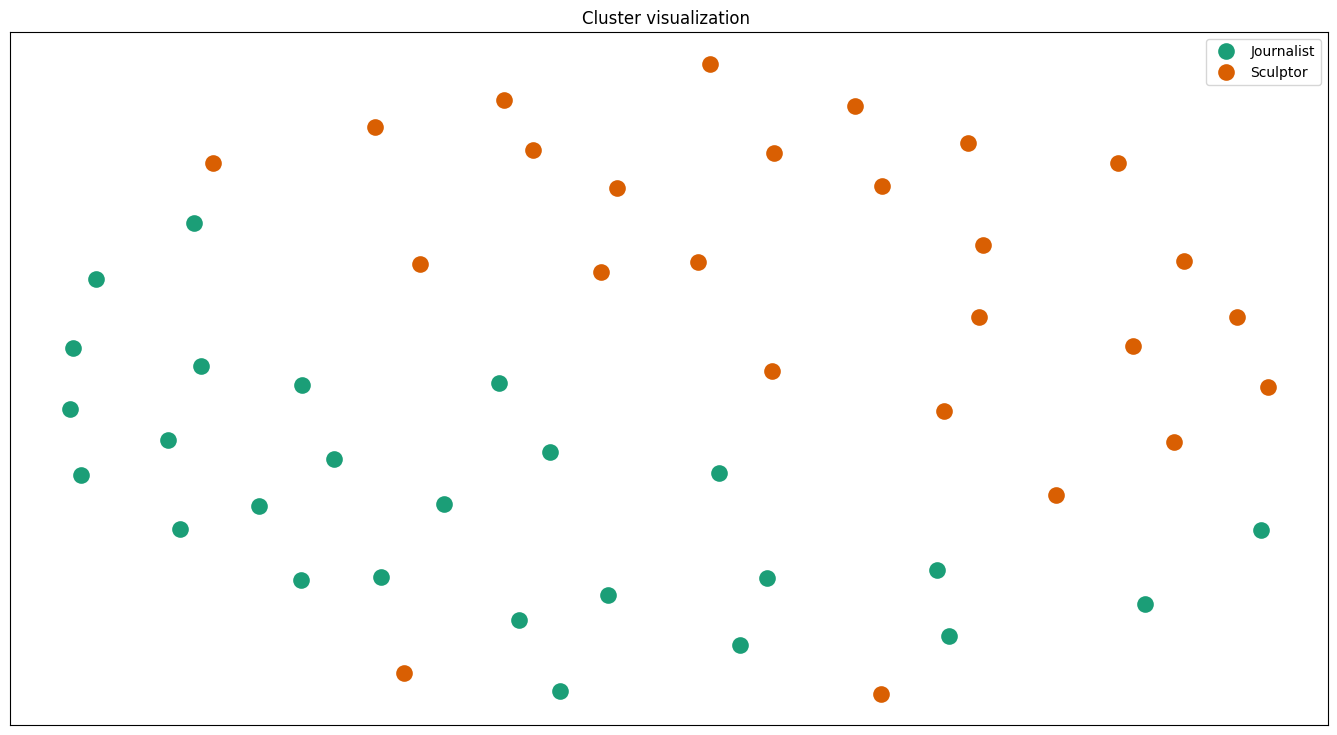

In [32]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

#dist_train = 1 - cosine_similarity(X_train_tfidf)
dist_test = 1 - cosine_similarity(X_test_tfidf)

# Use multidimensional scaling to convert the dist matrix into a 2-dimensional array
MDS()

# n_components=2 to plot results in a two-dimensional plane
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
#pos_train = mds.fit_transform(dist_train)
pos_test = mds.fit_transform(dist_test)
#xs_train, ys_train = pos_train[:, 0], pos_train[:, 1]
xs_test, ys_test = pos_test[:, 0], pos_test[:, 1]

#set up colors per clusters
cluster_colors = {0: '#1b9e77', 1: '#d95f02'}

#set up cluster names
#cluster_names = {0: 'Other', 1: 'Chemistry', 2: 'Physics'}
cluster_names = {0: 'Journalist', 1: 'Sculptor'}

#create data frame that has the result of the MDS plus the cluster numbers and titles
#df_train = pd.DataFrame(dict(x=xs_train, y=ys_train, label=km.labels_))
df_test = pd.DataFrame(dict(x=xs_test, y=ys_test, label=clusters_test))

#group by cluster
groups = df_test.groupby('label')

# set up plot
fig, ax = plt.subplots(figsize=(17, 9))
ax.margins(0.05)

#iterate through groups to layer the plot
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12,
            label=cluster_names[name],
            color=cluster_colors[name],
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',
        which='both',
        bottom=False,
        top=False,
        labelbottom=False)
    ax.tick_params(\
        axis= 'y',
        which='both',
        left=False,
        top=False,
        labelleft=False)

ax.legend(numpoints=1)
plt.title('Cluster visualization ')
plt.show()

**KG graph input** 

In [3]:
# Load JSON data
with open('Biographies/knowledge_graph.json') as file:
    data = json.load(file)

In [ ]:
"""
def extracted_after_last_slash(text):
    # Ensure the input is a string
    text = str(text)
    
    # Regex to find the part after the last slash
    match = re.search(r'[^/]+$', text)
    if match:
        return match.group(0)
    return None
"""

In [5]:
# Prepare data for clustering
from sklearn.model_selection import train_test_split

entries = []
categories = []

for category, people in data.items():
    for person in people:
        description = ". ".join([
            f"{extract_after_last_slash(str(binding['s']['value']))} {extract_after_last_slash(str(binding['p']['value']))} {extract_after_last_slash(str(binding['o']['value']))}"
            for binding in person['results']['bindings']
        ]) + "."
        entries.append(description)
        categories.append(category)  
        



# Create DataFrame
df_cluster = pd.DataFrame({'text': entries, 'category': categories})
df_cluster
#df_cluster.to_csv('df_cluster.csv', sep=",", encoding="utf-8")

# Shuffle and split the data
df_cluster = shuffle(df_cluster)
X_train, X_test, y_train, y_test = train_test_split(df_cluster['text'], df_cluster['category'], test_size=0.2, random_state=42)

In [6]:
# Using TFIDF vectorizer to convert convert words to Vector Space
# max_features = 800 --> best metrics results
tfidf_vectorizer = TfidfVectorizer(max_features=800, 
                                       use_idf=True,
                                       stop_words='english')
                                       #ngram_range=(1, 2))
                                       #tokenizer=nltk.word_tokenize)
                                      

# Fit the vectorizer to text data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)




In [7]:
features = tfidf_vectorizer.get_feature_names_out()
print(features)


['01' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12' '13' '14' '15'
 '16' '17' '18' '1822' '1840' '1843' '1880' '1882' '1883' '1888' '1892'
 '1895' '1898' '1899' '19' '1900' '1902' '1905' '1906' '1907' '1910'
 '1913' '1918' '1919' '1920' '1923' '1924' '1925' '1927' '1928' '1933'
 '1934' '1935' '1936' '1937' '1941' '1942' '1944' '1945' '1948' '1949'
 '1954' '1956' '1957' '1958' '1959' '1960' '1965' '1967' '1968' '1971'
 '1974' '1975' '1976' '1977' '1979' '1980' '1981' '1982' '1985' '1987'
 '1989' '1994' '19th' '20' '2001' '2005' '2007' '2009' '2010' '2011'
 '2012' '2014' '2015' '2016' '2017' '2019' '2020' '20th' '21' '21st' '22'
 '23' '24' '25' '26' '27' '28' '30' '300' '31' '_arkadyevich_ureklyan'
 '_chop' '_echeverría' '_halpine' '_morecambe' '_r' '_ralph_casimir'
 '_roberto_eisenmann_jr' '_the_association_of_lgbtq_journalists' 'abril'
 'abstract' 'accra' 'adebisi_akanji' 'adéagbo' 'affutu' 'africa' 'african'
 'agim_rada' 'agostini' 'agosto' 'agustín_cárdenas' 'aho' 'aires' 'al'
 '

In [8]:

# Initialize and fit KMeans algorithm
km = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, verbose=0, random_state=42)
km.fit(X_train_tfidf)

# Get cluster assignments for the training data
clusters_train = km.labels_

# Apply the model to the test data to get cluster assignments
clusters_test = km.predict(X_test_tfidf)


In [9]:
from sklearn import metrics

# Evaluation with the training data
print("Evaluation for train data:")
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y_train, clusters_train))
print("Completeness: %0.3feness" % metrics.completeness_score(y_train, clusters_train))
print("V-measure: %0.3f" % metrics.v_measure_score(y_train, clusters_train))
print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(y_train, clusters_train))
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X_train_tfidf, clusters_train))

# Evaluation with the test data
print("Evaluation for test data:")
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y_test, clusters_test))
print("Completeness: %0.3f" % metrics.completeness_score(y_test, clusters_test))
print("V-measure: %0.3f" % metrics.v_measure_score(y_test, clusters_test))
print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(y_test, clusters_test))
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X_test_tfidf, clusters_test))


Evaluation for train data:
Homogeneity: 0.000
Completeness: 0.000eness
V-measure: 0.000
Adjusted Rand-Index: -0.004
Silhouette Coefficient: 0.001
Evaluation for test data:
Homogeneity: 0.009
Completeness: 0.009
V-measure: 0.009
Adjusted Rand-Index: -0.020
Silhouette Coefficient: 0.109


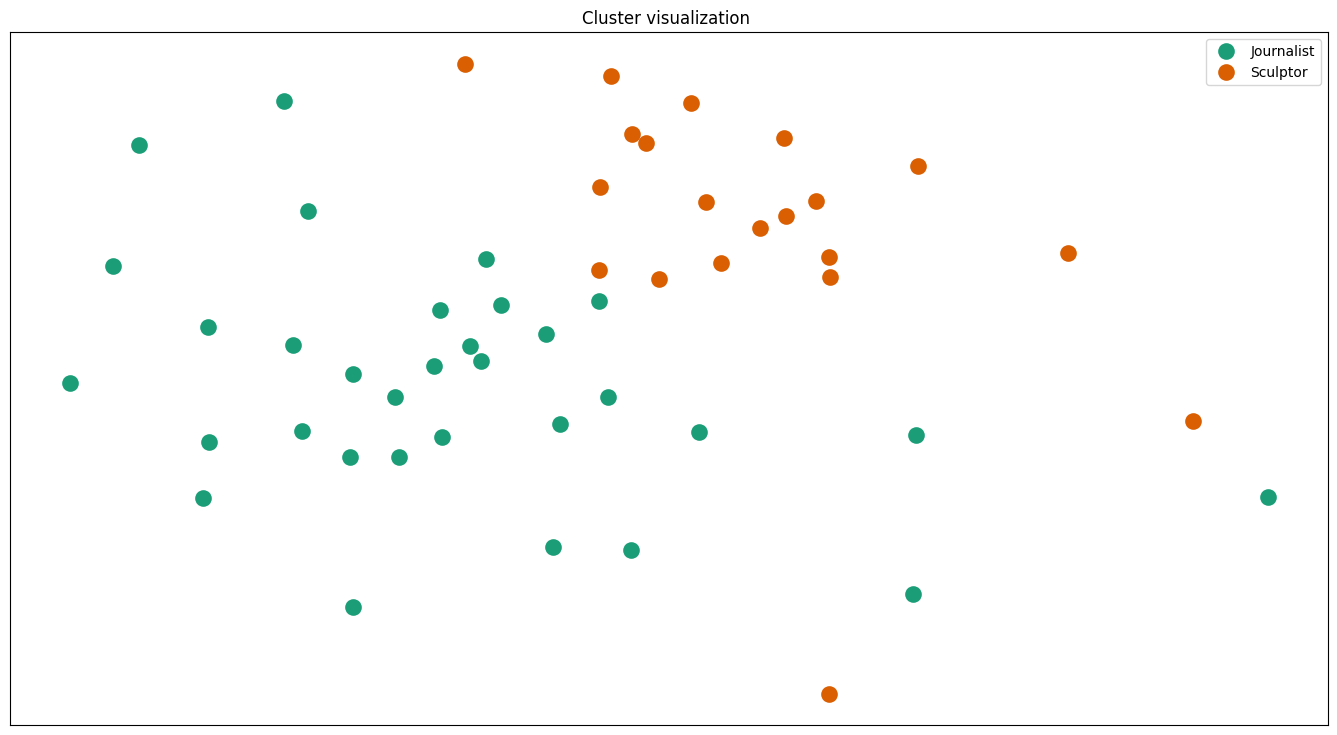

In [12]:

#dist_train = 1 - cosine_similarity(X_train_tfidf)
dist_test = 1 - cosine_similarity(X_test_tfidf)

# Use multidimensional scaling to convert the dist matrix into a 2-dimensional array
MDS()

# n_components=2 to plot results in a two-dimensional plane
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
#pos_train = mds.fit_transform(dist_train)
pos_test = mds.fit_transform(dist_test)
#xs_train, ys_train = pos_train[:, 0], pos_train[:, 1]
xs_test, ys_test = pos_test[:, 0], pos_test[:, 1]

#set up colors per clusters
cluster_colors = {0: '#1b9e77', 1: '#d95f02'}

#set up cluster names
cluster_names = {0: 'Journalist', 1: 'Sculptor'}

#create data frame that has the result of the MDS plus the cluster numbers and titles
#df_train = pd.DataFrame(dict(x=xs_train, y=ys_train, label=km.labels_))
df_test = pd.DataFrame(dict(x=xs_test, y=ys_test, label=clusters_test))

#group by cluster
groups = df_test.groupby('label')

# set up plot
fig, ax = plt.subplots(figsize=(17, 9))
ax.margins(0.05)

#iterate through groups to layer the plot
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12,
            label=cluster_names[name],
            color=cluster_colors[name],
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',
        which='both',
        bottom=False,
        top=False,
        labelbottom=False)
    ax.tick_params(\
        axis= 'y',
        which='both',
        left=False,
        top=False,
        labelleft=False)

ax.legend(numpoints=1)
plt.title('Cluster visualization ')
plt.show()